# Titanic Survival Prediction - Internship Task # 1

In this project, we use the Titanic dataset to build a machine learning model that predicts whether a passenger survived the disaster.  
We go through steps of loading, cleaning, preprocessing, training, and evaluating the model.


In [15]:
#Verified Python environment to ensure code runs in the correct interpreter.(Setting up environment)
import sys
print(sys.executable)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\python.exe


### Data Loading and Exploration
Loaded the Titanic dataset (train.csv) which is present in the same folder as the notebook file
, previewed the first 5 rows to understand the data and its structure
, checked column data types and missing values (info())
, generated summary statistics for numeric columns (describe())
, and counted missing values per column.

In [16]:
import pandas as pd

# Load the Titanic dataset (make sure train.csv is in the same folder as this notebook)
df = pd.read_csv("train.csv")

# Show first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Info about columns (data types, missing values)
df.info()

# Quick stats for numeric columns
print(df.describe())

# Check how many missing values in each column
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    

In [18]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Data Cleaning
Dropped irrelevant columns because they dont provide predicted value
and handled missing values by replacing missing "Age" with the median age and missing "Embarked with the most common port (mode)".

In [19]:

# Drop unnecessary columns
df = df.drop([col for col in ['PassengerId', 'Name', 'Ticket', 'Cabin'] if col in df.columns], axis=1)

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


### Feature Engineering
Converted categorical variables  into numeric like Sex converted into 0 and 1, and one-hot encoded "Embarked" and "PClass" dropped first category to avoid redundancy and 
created a new feature to capture family influence i.e "FamilySize = SibSp + Parch + 1" to capture family influence.
    (SibSp means number of siblings/spouses) and
    (Parch means number of parents/children)

In [20]:
#CONVERT CATEGORICAL TO NUMERICAL
# Convert 'Sex' to numeric: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' and 'Pclass'
df = pd.get_dummies(df, columns=['Embarked', 'Pclass'], drop_first=True)

# Created a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


### Data Splitting
Split dataset into: Features (X) i.e all predictors and Target (y) i.e Survived and used 80% data for training and 20% for testing.

In [21]:

from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
# Verify the final dataframe
print(df.columns)

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3', 'FamilySize'],
      dtype='object')


### Model Training
Trained a "Random Forest Classifier"
    with n_estimators=200: number of trees in the forest,
    max_depth=8: limit depth to avoid overfitting, and
    random_state=42: ensures reproducibility.
Choosed Random Forest because it handles categorical + numerical feautres well, it is robust against overfitting compared to single decision trees, and it provides feauture importance analysis.

In [23]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=8, 
    random_state=42, 
    class_weight="balanced"
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Model Evaluation
Accuracy: Overall percentage of correct predictions.
Classification Report: Precision, recall, and F1-score for survived/not survived classes.
Confusion Matrix: Breakdown of true vs predicted outcomes.

In [24]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8324
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[93 12]
 [18 56]]


### Feauture Importance
Ranked features by their contribution to the model's predictions.
Plotted a bar chart to visualize which features matter the most (e.g Sex, Fare, Age, FamilySize, etc)


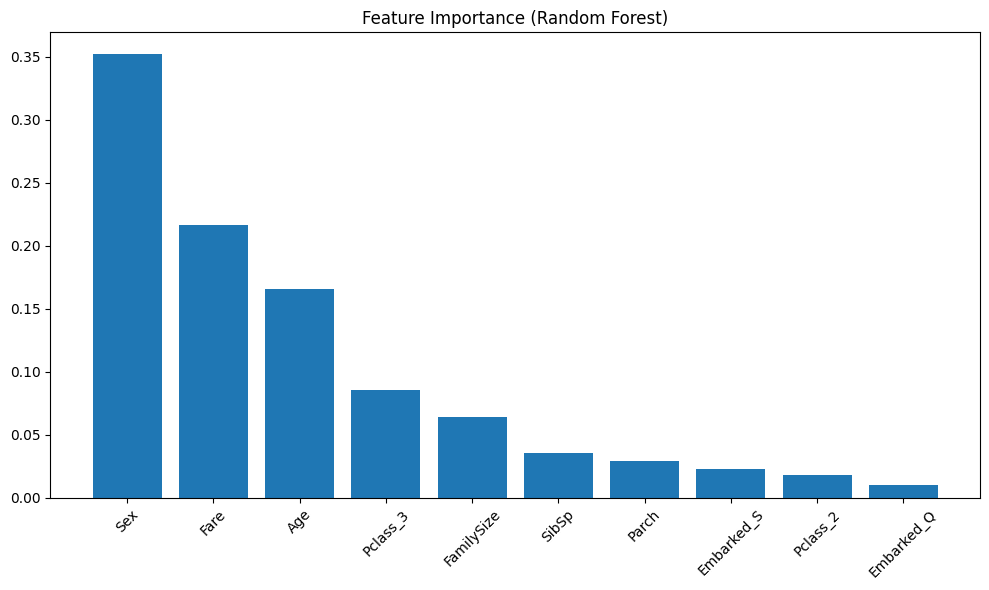

In [25]:
# FEATURE IMPORTANCE
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort them by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


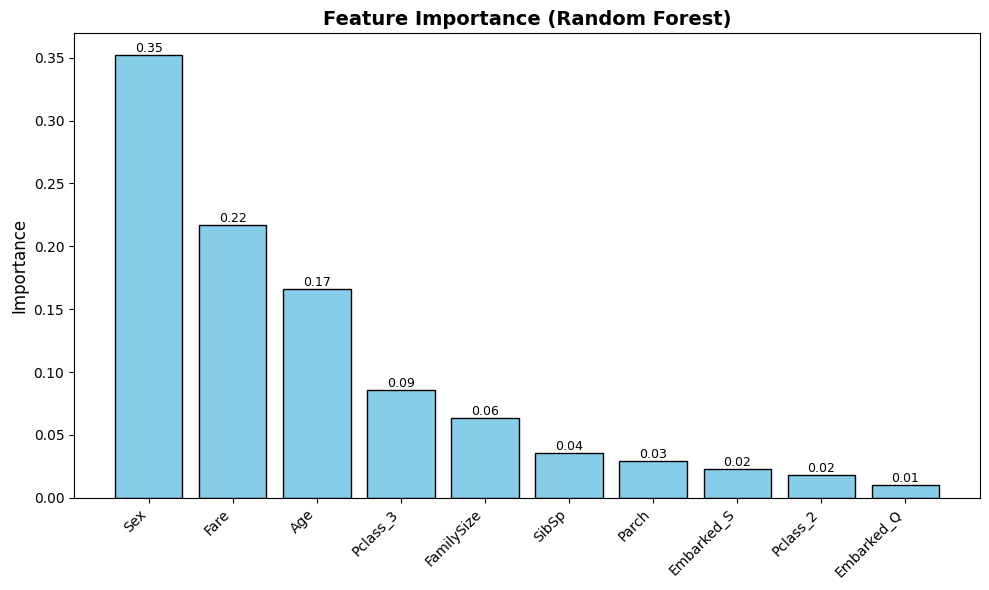

In [26]:
# FEATURE IMPORTANCE (Enhanced Plot)
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
bars = plt.bar(range(len(importances)), importances[indices], align='center', color="skyblue", edgecolor="black")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45, ha="right")
plt.ylabel("Importance", fontsize=12)
plt.title("Feature Importance (Random Forest)", fontsize=14, fontweight="bold")

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height,
             f"{height:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()